## **Load des données et animations** ##



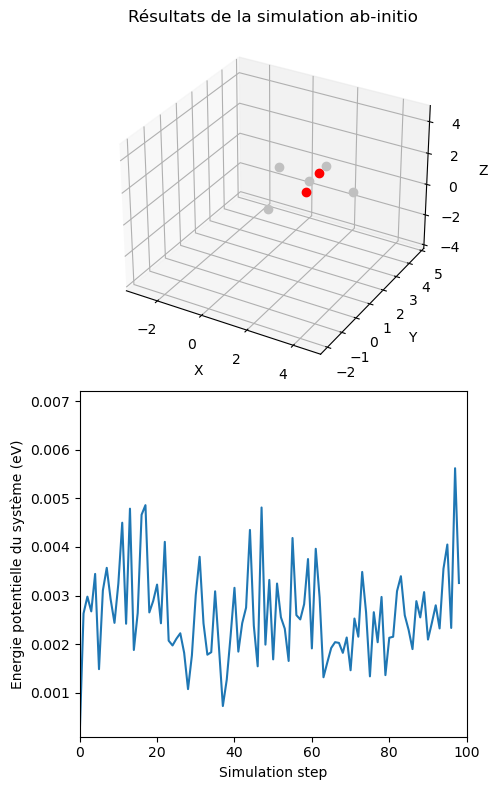

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import pandas as pd

%matplotlib inline 

#Loader du fichier .xyz
def load_data(file):
    o1_index=[2]
    o2_index=[3]
    h1_index=[4]
    h2_index=[5]
    h3_index=[6]
    h4_index=[7]
    h5_index=[8]

    o1=[]
    o2=[]
    h1=[]
    h2=[]
    h3=[]
    h4=[]
    h5=[]

    with open(file, 'r') as infile:

        for index, line in enumerate(infile):
            items = line.split()

            if index%9 in o1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o1.append([0,x,y,z])

            if index%9 in o2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                o2.append([0,x,y,z])

            if index%9 in h1_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h1.append([1,x,y,z])   

            if index%9 in h2_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h2.append([1,x,y,z])

            if index%9 in h3_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h3.append([1,x,y,z])

            if index%9 in h4_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h4.append([1,x,y,z])

            if index%9 in h5_index:
                kind, x, y, z = items[0], float(items[1]), float(items[2]), float(items[3])
                h5.append([1,x,y,z])
                
    return np.concatenate((o1, o2, h1, h2, h3, h4, h5), axis=1).reshape(10000, 7, 4) #10000 fois 7 colomnes de 4 éléments  (particule, x, y, z)

#Loader de l'output de la simulation (fichier .out)
output=pd.read_csv('new_energies_sparse.out', sep=' ', header=None)

#output=pd.read_csv('zundel-1.ener', sep='       ')
#Extraction des énergies (5eme colonne)
energies=output[4]

#energies=output['     Pot.[a.u.]'][0::5]

#Load du fichier .xyz
#dataset=load_data("zundel-pos-1.xyz")
dataset=load_data("new_positions_sparse.xyz")

#################
# Plot des données (Animation 3D + Energie)
#################

#Nombre de data utilisées pour l'animation
N=100

#Init animation 2D
def init():
    return graph,

#Fonction update plot energies
def update_en(num):
    graph.set_data(x[:num],y[:num])
    return graph,

#Mise en forme des trajectoires
def transform_data(X, Y, Z):
    t = np.vstack((X, Y, Z))
    return t

#Fonction update pour le plot des trajectoires
def update_lines(num, dataLines, lines) :
    for line, data in zip(lines, dataLines) :
        line.set_data(data[0:2, num-1:num])
        line.set_3d_properties(data[2,num-1:num])
    return lines

#Fonction update des deux plots
def update_both(num, data2, line2):
    update_en(num)
    update_lines(num, data2, line2)
    
#Création de la figure
fig= plt.figure(figsize=(5, 8))

#ax1 = plot des énergies
ax1=fig.add_subplot(2, 1, 2) 
ax1.set_xlim(0, N)
ax1.set_ylim(np.min(energies), np.max(energies))
ax1.set_xlabel("Simulation step")
ax1.set_ylabel("Energie potentielle du système (eV)")

graph, = plt.plot([], [], '-')

#ax = plot des trajectoires
ax=fig.add_subplot(2, 1, 1, projection='3d')

ax.set_xlim3d([np.min(dataset[:, :, 1][:N]), np.max(dataset[:, :, 1][:N])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(dataset[:, :, 2][:N]), np.max(dataset[:, :, 2][:N])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(dataset[:, :, 3][:N]), np.max(dataset[:, :, 3][:N])])
ax.set_zlabel('Z')

ax.set_title('Résultats de la simulation ab-initio')

plt.tight_layout()

# Données de l'énergie
x = range(N)
y = energies[:N]

# Données 3D
data=[]
lines=[]
colors=['r', 'r', 'silver','silver', 'silver', 'silver', 'silver'] #couleur des atomes
for i in range(dataset.shape[1]):
    coord=dataset[:, i][:N]
    X=coord[:, 1]
    Y=coord[:, 2]
    Z=coord[:, 3]
    data.append(transform_data(X, Y, Z))
    
    lines.append(ax.plot(data[0][0,0:1], data[0][1,0:1], data[0][2,0:1], 'o', color=colors[i])[0])

# Objet d'animation
ani = animation.FuncAnimation(fig, update_both, len(X), fargs=(data, lines),
                              interval=100, blit=False)

ani.save('ab-initio.mp4')
plt.show()

In [2]:
dataset=dataset

In [3]:
output

,0,1,2,3,4,5,6,7,8
0,1.0,2.0,0.003692,0.003269,0.000096,0.003174,0.000302,95.439881,NaN
1,1.0,102.0,0.004527,0.006531,0.002632,0.003899,0.000371,117.256850,NaN
2,1.0,202.0,0.003945,0.007161,0.002978,0.004182,0.000398,125.779360,NaN
3,1.0,302.0,0.003904,0.005873,0.002675,0.003198,0.000305,96.178014,NaN
4,1.0,402.0,0.004485,0.007464,0.003446,0.004018,0.000383,120.833550,NaN
...,...,...,...,...,...,...,...,...,...
9995,1.0,999502.0,0.013434,0.006745,0.002987,0.003757,0.000358,112.999770,NaN
9996,1.0,999602.0,0.012982,0.004565,0.001085,0.003480,0.000331,104.660550,NaN
9997,1.0,999702.0,0.013049,0.006868,0.003645,0.003222,0.000307,96.906016,NaN
9998,1.0,999802.0,0.013642,0.006621,0.002572,0.004050,0.000386,121.790850,NaN


## **Mise en place des descripteurs (matrice de Coulomb)** ##

In [4]:
from ase import Atoms
from dscribe.descriptors import CoulombMatrix

#Fonction pour la création de la matrice de Coulomb à partir d'un dataset
def create_CM(data):
    cm = CoulombMatrix(n_atoms_max=7)
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

## **Séparation et exploration statistique des données**. ##

data shape : (10000, 7, 4)
target shape : (10000,)


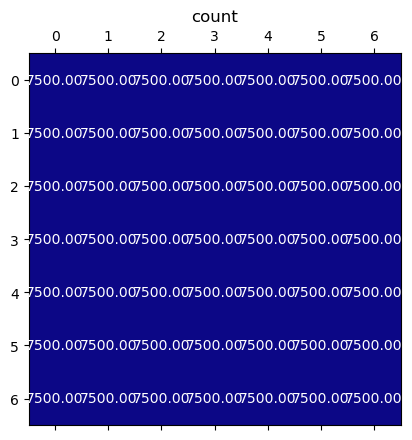

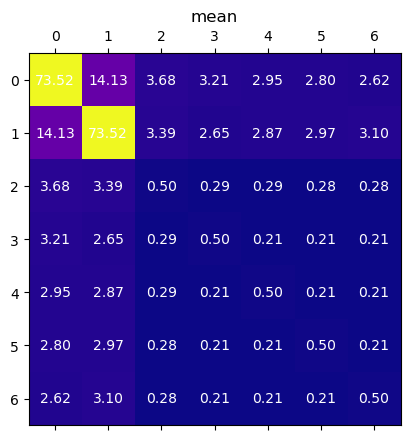

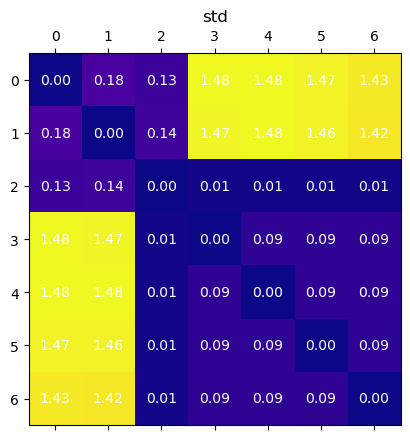

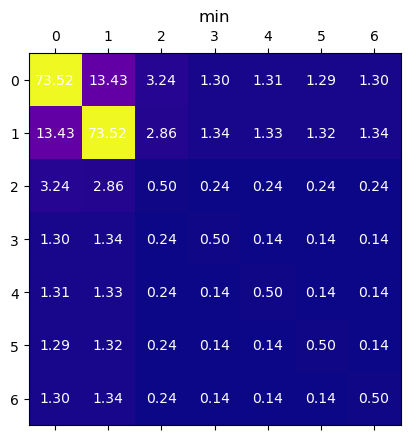

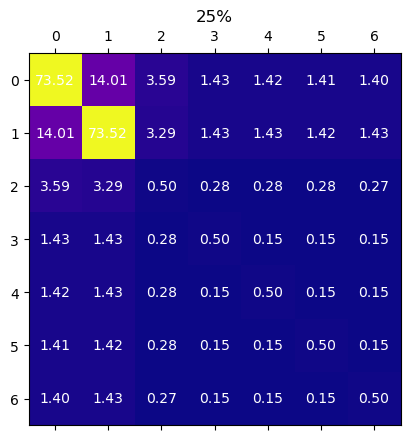

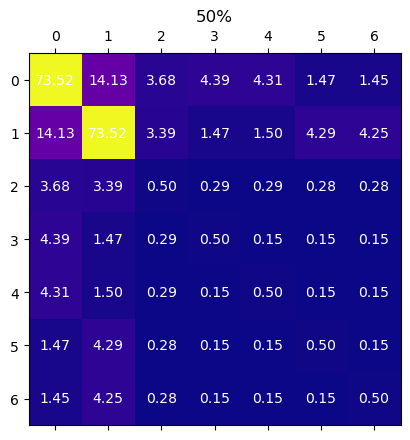

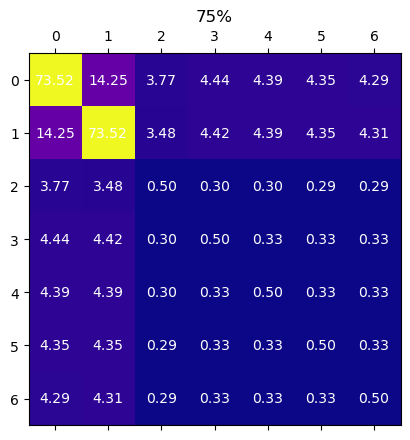

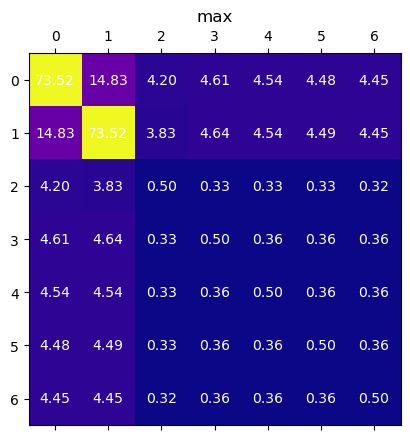

In [5]:
#Séparation des données
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

print("data shape :", dataset.shape)
print("target shape :", energies.shape)
X_train, X_test, y_train, y_test=train_test_split(dataset, energies, random_state=22)

#création des matrices de Coulomb pour les données d'entrainement
X_train_CM=create_CM(X_train)
X_test_CM=create_CM(X_test)

#conversion dans un Dataset pour explorer les données statistiquement avec les outils pandas
X_train_DF=pd.DataFrame(X_train_CM)

stat=X_train_DF.describe()

statnp=stat.to_numpy().reshape(8, 7, 7)

for i, l in enumerate(stat.index):
    #plt.subplot(2, 4, i+1)
    plt.matshow(statnp[i], cmap="plasma")
    for (x, y), value in np.ndenumerate(statnp[i]):
        plt.text(x, y, f"{value:.2f}", va="center", ha="center", color="white")
    plt.title(l)


In [6]:
dataset[-1]

array([[ 0.        ,  2.58654844, 12.89679366, 21.45336724],
       [ 0.        , -0.20412227, 13.11867535, 24.9613151 ],
       [ 1.        ,  1.21485485, 12.90784129, 23.29377728],
       [ 1.        , -0.7129864 , 14.85135666, 25.21131349],
       [ 1.        , -1.63287982, 11.99057295, 25.01914398],
       [ 1.        ,  3.9226899 , 11.70316952, 21.33694977],
       [ 1.        ,  1.88295753, 13.20836486, 19.83790884]])

Text(0.5, 1.0, 'Exemple de matrice de Coulomb')

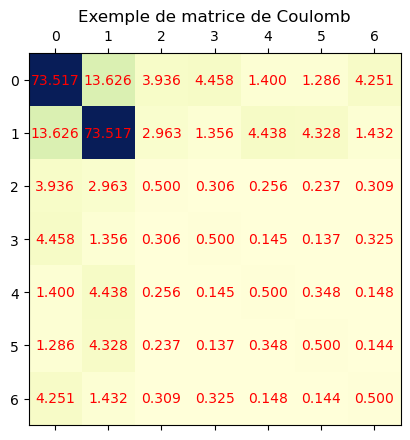

In [7]:
plt.matshow(create_CM(X_train)[0].reshape(7, 7), cmap="YlGnBu")

for (x, y), value in np.ndenumerate(create_CM(X_train)[0].reshape(7, 7)):
    plt.text(x, y, f"{value:.3f}", va="center", ha="center", color="red")
    
plt.title("Exemple de matrice de Coulomb")

Réduction des données


In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_CM_red=scaler.fit_transform(X_train_CM)
X_test_CM_red=scaler.fit_transform(X_test_CM)

#scaling des y
y_train=scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test=scaler.fit_transform(y_test.to_numpy().reshape(-1, 1))

### Eigenspectrum ###

In [9]:
def create_CM_eigen(data):
    cm = CoulombMatrix(n_atoms_max=7, permutation='eigenspectrum')
    zundel_steps=[]
    for i in range(data.shape[0]):
        zundel_steps.append(cm.create(Atoms("O2H5", [(data[i][j][1], data[i][j][2], data[i][j][3]) for j in range(data.shape[1])])))
    return np.array(zundel_steps)

In [10]:
pd.DataFrame(create_CM_eigen(X_train)).describe()

,0,1,2,3,4,5,6
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,88.701505,59.682468,0.417565,0.242826,0.173534,0.162842,0.152649
std,0.183102,0.177838,0.009194,0.006553,0.004729,0.004301,0.005124
min,87.977655,58.979104,0.388062,0.219960,0.157364,0.143278,0.131788
25%,88.582326,59.559842,0.411327,0.238478,0.170198,0.159958,0.149336
50%,88.705274,59.678830,0.417490,0.242890,0.173346,0.162958,0.152911
75%,88.827863,59.797708,0.423616,0.247244,0.176679,0.165817,0.156172
max,89.435804,60.383806,0.453386,0.267795,0.194823,0.178765,0.169214


In [11]:
X_train_CMe=create_CM_eigen(X_train)
X_test_CMe=create_CM_eigen(X_test)
X_train_CMe_red=scaler.fit_transform(X_train_CMe)
X_test_CMe_red=scaler.fit_transform(X_test_CMe)

## PIV Vector ##

In [12]:
from scipy.spatial import distance

def PIV_descr(X):
    piv=[]
    for i in range(len(X)):
        dist=distance.cdist(dataset[i][:, 1:], dataset[i][:, 1:], 'euclidean')
        a=np.array([dist[0, 1]])
        b=np.concatenate((dist[0, 2:],dist[1, 2:]))
        c=[]
        for i in range(2, dist.shape[0]):
            c=np.concatenate((c, dist[i, i+1:]))

        bs=-np.sort(-b)
        cs=-np.sort(-c)
        piv.append(np.concatenate((a, bs, cs)))
        
    return piv

In [13]:
X_train_PIV=PIV_descr(X_train)
X_train_PIV_red=scaler.fit_transform(X_train_PIV)
X_test_PIV=PIV_descr(X_test)
X_test_PIV_red=scaler.fit_transform(X_test_PIV)

## **Prédicteur naif** ##

In [14]:
from sklearn.metrics import mean_squared_error

def naive_predictor(xtrain, ytrain):
    return np.ones((xtrain.shape[0],))*ytrain.mean()

y_fit=naive_predictor(X_train_CMe_red, y_train)
y_pred_test=naive_predictor(X_test_CMe_red, y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


In [15]:
y_fit=naive_predictor(X_train_PIV_red, y_train)
y_pred_test=naive_predictor(X_test_PIV_red, y_train)


mse=mean_squared_error(np.array(y_train), y_fit)
mse_test=mean_squared_error(np.array(y_test), y_pred_test)
print(mse)
print(mse_test)

1.0
1.0


## **Modèle linéaire** ##

In [16]:
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_CMe_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852113
0.7564859632710091


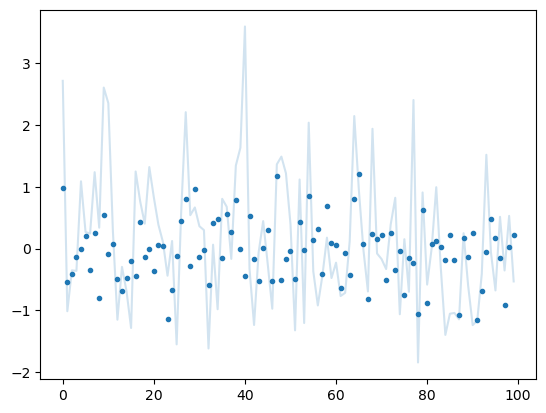

In [17]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_train_CMe_red[:100]), marker='.')
plt.plot(np.arange(0, len(y_train[:100])), y_train[:100], alpha=0.2)

In [125]:
#PIV
from sklearn.linear_model import RidgeCV

a=np.logspace(-10, 10, 1000)
model=RidgeCV(alphas=a)
model.fit(X_train_PIV_red, y_train)

print("Best regularization parameter :", model.alpha_)
print("RMSE moyen:", -model.best_score_)

y_pred_test_rcv=model.predict(X_test_PIV_red)
mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
print(mse_test_rcv)

Best regularization parameter : 4939.621743878326
RMSE moyen: 0.9993612844352441
1.0020556320981489


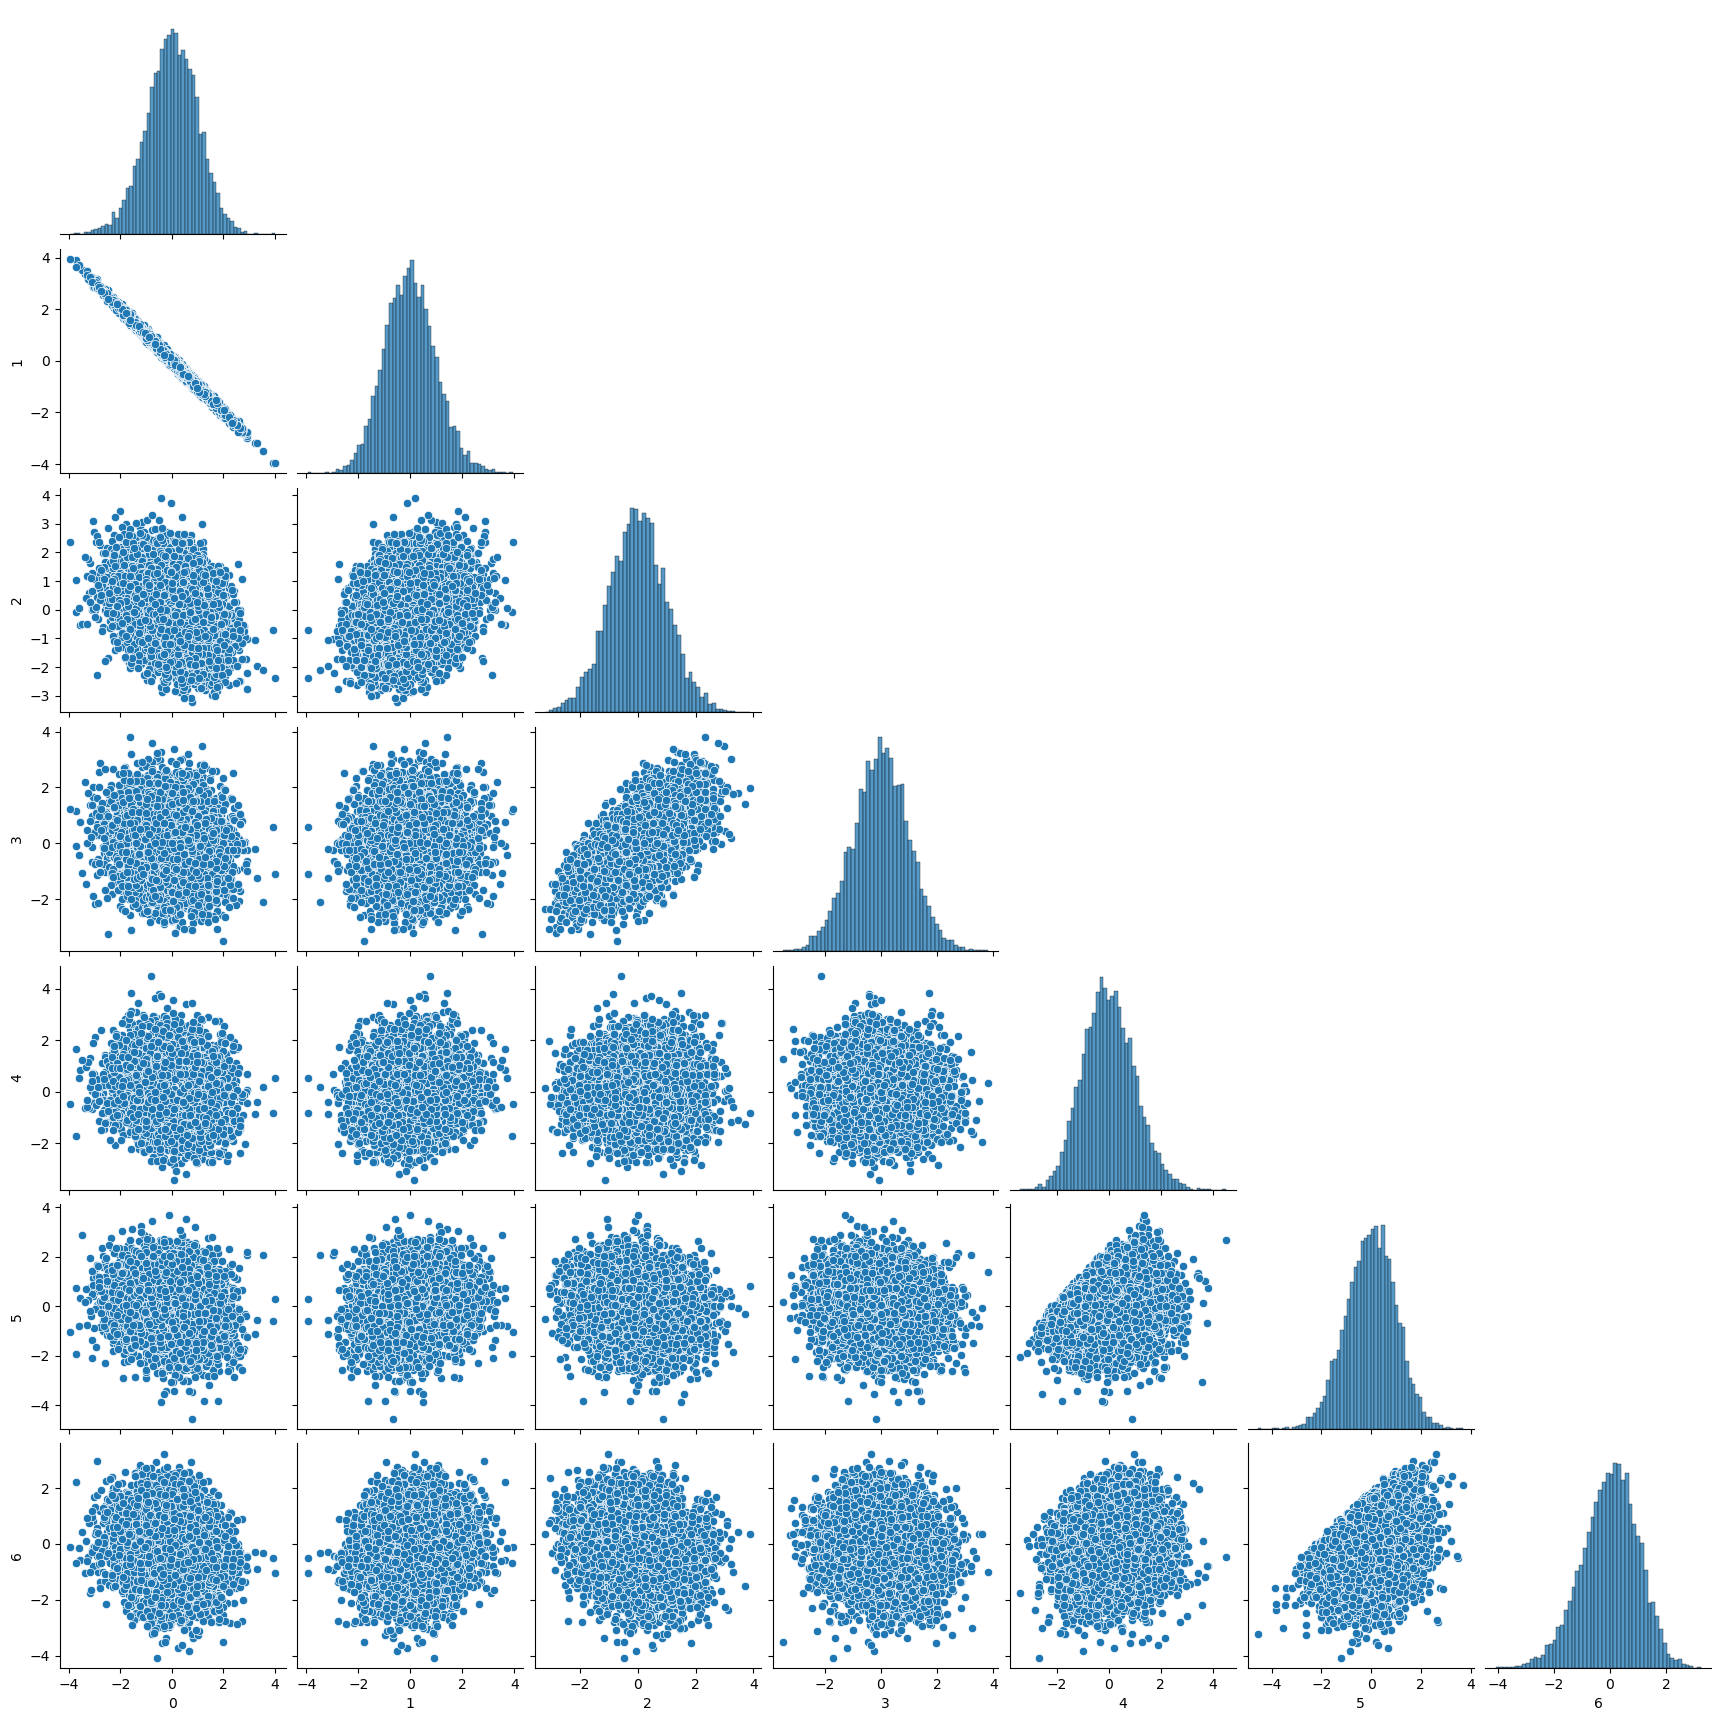

In [126]:
import seaborn as sns

sns.pairplot(pd.DataFrame(X_train_CMe_red), corner=True)

In [127]:
from sklearn.preprocessing import PolynomialFeatures

mse_list=[]
mse_test_list=[]
for d in range(1,5):
    poly=PolynomialFeatures(degree=d)
    Zmodif=poly.fit_transform(X_train_CMe_red)
    Zmodif_test=poly.fit_transform(X_test_CMe_red)

    a=np.logspace(-10, 10, 1000)
    model=RidgeCV(alphas=a)
    model.fit(Zmodif, y_train)

    print("Best regularization parameter :", model.alpha_)
    print("RMSE moyen:", -model.best_score_)

    y_pred_test_rcv=model.predict(Zmodif_test)
    mse_test_rcv=mean_squared_error(np.array(y_test), y_pred_test_rcv)
    print(mse_test_rcv)
    mse_list.append(-model.best_score_)
    mse_test_list.append(mse_test_rcv)

Best regularization parameter : 17.030650292528428
RMSE moyen: 0.7911226116852111
0.7564859632710308
Best regularization parameter : 14.162866162991973
RMSE moyen: 0.5399559357654162
0.5213666113617779
Best regularization parameter : 17.030650292528428
RMSE moyen: 0.5402247037401428
0.5217424378175992
Best regularization parameter : 42.818517986524064
RMSE moyen: 0.5518063896545434
0.5342317688300231


Text(0.5, 0, 'Dimension du polynome')

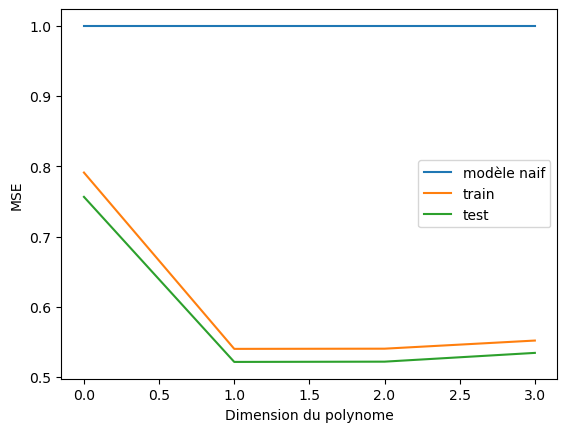

In [131]:
plt.plot([1]*len(mse_list), label='modèle naif')
plt.plot(mse_list, label="train")
plt.plot(mse_test_list, label='test')
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Dimension du polynome")

In [132]:
y_pred=model.predict(Zmodif_test)

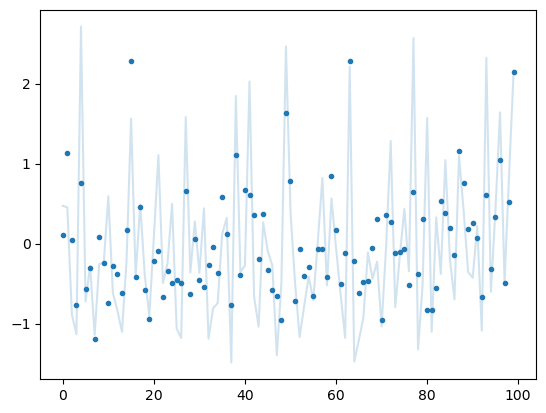

In [133]:
plt.scatter(np.arange(0, len(y_test[:100])),y_pred[:100], marker='.')
plt.plot(np.arange(0, len(y_test[:100])), y_test[:100], alpha=0.2)

In [134]:
from sklearn.linear_model import ElasticNetCV

a=np.logspace(-10, 10)
model=ElasticNetCV(alphas=a, max_iter=1000000)
model.fit(X_train_CMe_red, y_train)

print("Best regularization parameter :", model.alpha_)
#print("RMSE moyen:", -model.best_score_)

y_pred_train_en=model.predict(X_train_CMe_red)
mse_train_en=mean_squared_error(np.array(y_train), y_pred_train_en)
print(mse_train_en)


y_pred_test_en=model.predict(X_test_CMe_red)
mse_test_en=mean_squared_error(np.array(y_test), y_pred_test_en)
print(mse_test_en)

Best regularization parameter : 0.000339322177189533
0.7893650565523528
0.7564322245105621


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
np.arange(1, 80, 30)

array([ 1, 31, 61])

In [136]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import pairwise

from sklearn.model_selection import GridSearchCV 

krr=GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5, param_grid={"alpha":np.logspace(-20, 2, 10)})

krr.fit(X_train_CMe_red, y_train)

y_pred_test_krr=krr.predict(X_test_CMe_red)
mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)

print(mse_test)
#y_pred_test_krr=krr.predict(X_test_CMe_red)
#mse_test_krr=[]
#A=np.logspace(-20, 2, 10)
#for a in A:
#    krr = KernelRidge(alpha=a, kernel='rbf')
#    krr.fit(X_train_CMe_red, y_train)
#
#    y_pred_test_krr=krr.predict(X_test_CMe_red)
#
#    mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)
#    mse_test_krr.append(mse_test)

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=3.26455e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=3.08084e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=3.22417e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=2.00438e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=Fal

KeyboardInterrupt: 

In [138]:
mse_test_krr=[]
A=np.logspace(-20, 2, 10)
for a in A:
    krr = KernelRidge(alpha=a, kernel='rbf')
    krr.fit(X_train_CMe_red, y_train)

    y_pred_test_krr=krr.predict(X_test_CMe_red)

    mse_test=mean_squared_error(np.array(y_test), y_pred_test_krr)
    mse_test_krr.append(mse_test)

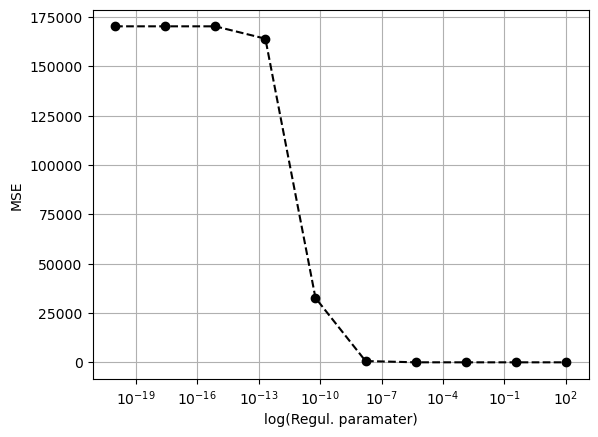

In [139]:
plt.semilogx(A, mse_test_krr, marker='o', linestyle='--', color='black')
plt.xlabel("log(Regul. paramater)")
plt.ylabel("MSE")
plt.grid(True, which="both", ls="-")
plt.show()

In [140]:
print("Best score KRR :", np.min(mse_test_krr))
idx=np.where(np.array(mse_test_krr)==np.min(mse_test_krr))
print("Best param KRR :", A[idx])

Best score KRR : 0.5443779420662072
Best param KRR : [0.35938137]


## **Réseau de neurones** ##

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 15)                120       
                                                                 
 dense_20 (Dense)            (None, 15)                240       
                                                                 
 dense_21 (Dense)            (None, 1)                 16        
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
 6/94 [>.............................] - ETA: 0s - loss: 1.5514 - mean_squared_error: 1.3019 

2022-11-24 20:25:01.717379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


92/94 [============================>.] - ETA: 0s - loss: 1.2159 - mean_squared_error: 0.9744

2022-11-24 20:25:02.856637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 13ms/step - loss: 1.2137 - mean_squared_error: 0.9724 - val_loss: 1.0053 - val_mean_squared_error: 0.7748
Epoch 2/300
94/94 [==============================] - 1s 13ms/step - loss: 1.0260 - mean_squared_error: 0.8087 - val_loss: 0.9633 - val_mean_squared_error: 0.7599
Epoch 3/300
94/94 [==============================] - 1s 12ms/step - loss: 0.9870 - mean_squared_error: 0.7956 - val_loss: 0.9415 - val_mean_squared_error: 0.7616
Epoch 4/300
94/94 [==============================] - 1s 12ms/step - loss: 0.9535 - mean_squared_error: 0.7846 - val_loss: 0.8983 - val_mean_squared_error: 0.7396
Epoch 5/300
94/94 [==============================] - 1s 12ms/step - loss: 0.9255 - mean_squared_error: 0.7754 - val_loss: 0.8804 - val_mean_squared_error: 0.7389
Epoch 6/300
94/94 [==============================] - 1s 12ms/step - loss: 0.9011 - mean_squared_error: 0.7671 - val_loss: 0.8600 - val_mean_squared_error: 0.7335
Epoch 7/300
94/94 [=====================

94/94 [==============================] - 1s 12ms/step - loss: 0.5810 - mean_squared_error: 0.5491 - val_loss: 0.5788 - val_mean_squared_error: 0.5469
Epoch 102/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5791 - mean_squared_error: 0.5472 - val_loss: 0.5816 - val_mean_squared_error: 0.5499
Epoch 103/300
94/94 [==============================] - 1s 13ms/step - loss: 0.5804 - mean_squared_error: 0.5487 - val_loss: 0.5680 - val_mean_squared_error: 0.5363
Epoch 104/300
94/94 [==============================] - 1s 13ms/step - loss: 0.5787 - mean_squared_error: 0.5471 - val_loss: 0.5733 - val_mean_squared_error: 0.5418
Epoch 105/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5772 - mean_squared_error: 0.5457 - val_loss: 0.5743 - val_mean_squared_error: 0.5427
Epoch 106/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5786 - mean_squared_error: 0.5473 - val_loss: 0.5698 - val_mean_squared_error: 0.5385
Epoch 107/300
94/94 [=========

94/94 [==============================] - 1s 12ms/step - loss: 0.5754 - mean_squared_error: 0.5472 - val_loss: 0.5800 - val_mean_squared_error: 0.5519
Epoch 152/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5736 - mean_squared_error: 0.5454 - val_loss: 0.5663 - val_mean_squared_error: 0.5379
Epoch 153/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5746 - mean_squared_error: 0.5465 - val_loss: 0.5632 - val_mean_squared_error: 0.5351
Epoch 154/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5751 - mean_squared_error: 0.5470 - val_loss: 0.5663 - val_mean_squared_error: 0.5381
Epoch 155/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5719 - mean_squared_error: 0.5438 - val_loss: 0.5618 - val_mean_squared_error: 0.5337
Epoch 156/300
94/94 [==============================] - 1s 13ms/step - loss: 0.5750 - mean_squared_error: 0.5470 - val_loss: 0.5634 - val_mean_squared_error: 0.5354
Epoch 157/300
94/94 [=========

94/94 [==============================] - 1s 12ms/step - loss: 0.5691 - mean_squared_error: 0.5427 - val_loss: 0.5685 - val_mean_squared_error: 0.5420
Epoch 202/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5721 - mean_squared_error: 0.5458 - val_loss: 0.5702 - val_mean_squared_error: 0.5438
Epoch 203/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5688 - mean_squared_error: 0.5424 - val_loss: 0.5619 - val_mean_squared_error: 0.5356
Epoch 204/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5690 - mean_squared_error: 0.5428 - val_loss: 0.5569 - val_mean_squared_error: 0.5306
Epoch 205/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5701 - mean_squared_error: 0.5439 - val_loss: 0.5608 - val_mean_squared_error: 0.5345
Epoch 206/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5705 - mean_squared_error: 0.5443 - val_loss: 0.5651 - val_mean_squared_error: 0.5387
Epoch 207/300
94/94 [=========

94/94 [==============================] - 1s 12ms/step - loss: 0.5684 - mean_squared_error: 0.5432 - val_loss: 0.5632 - val_mean_squared_error: 0.5381
Epoch 252/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5670 - mean_squared_error: 0.5419 - val_loss: 0.5702 - val_mean_squared_error: 0.5451
Epoch 253/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5670 - mean_squared_error: 0.5419 - val_loss: 0.5575 - val_mean_squared_error: 0.5325
Epoch 254/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5664 - mean_squared_error: 0.5414 - val_loss: 0.5586 - val_mean_squared_error: 0.5335
Epoch 255/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5665 - mean_squared_error: 0.5414 - val_loss: 0.5598 - val_mean_squared_error: 0.5346
Epoch 256/300
94/94 [==============================] - 1s 12ms/step - loss: 0.5691 - mean_squared_error: 0.5441 - val_loss: 0.5579 - val_mean_squared_error: 0.5328
Epoch 257/300
94/94 [=========

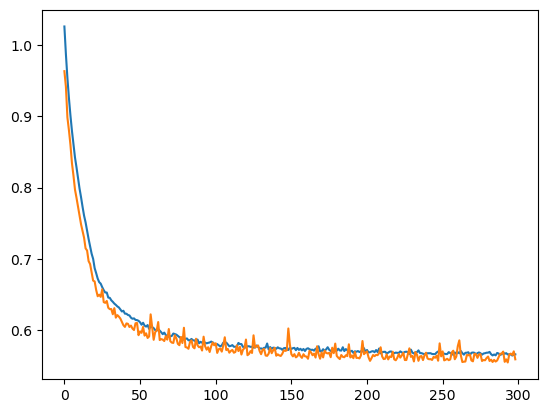

In [39]:
import keras
import tensorflow as tf
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.8)

model=Sequential()
model.add(Dense(units=15, activation='tanh', input_shape=(7,), kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.2))
model.add(Dense(units=15, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=1))
model.summary()

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['mean_squared_error'])

Hist=model.fit(X_train_CMe_red, y_train, epochs=300, batch_size=64, validation_split=0.2)

plt.plot(Hist.history['loss'][1:])
plt.plot(Hist.history['val_loss'][1:])

#model.predict(X_train_CM_red)

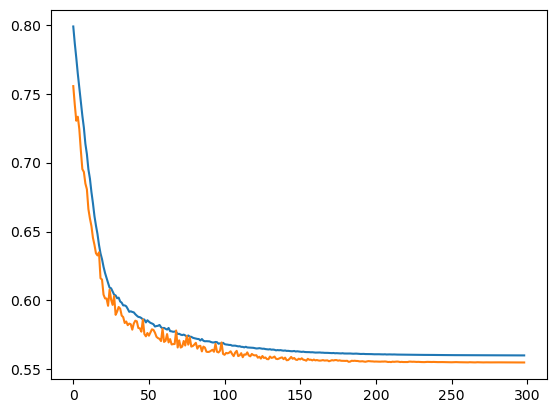

In [38]:
plt.plot(Hist.history['mean_squared_error'][1:])
plt.plot(Hist.history['val_mean_squared_error'][1:])

4/4 [==============================] - 0s 7ms/step


2022-11-23 23:41:52.491502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


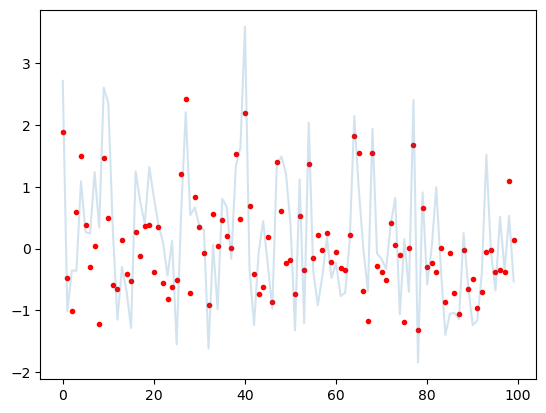

In [154]:
plt.scatter(np.arange(0, len(y_train[:100])),model.predict(X_test_CMe_red[:100]), marker='.', color='red')
plt.plot(np.arange(0, len(y_train[:100])), y_test[:100], alpha=0.2)

79/79 [==============================] - 0s 2ms/step


2022-11-24 20:30:45.483635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


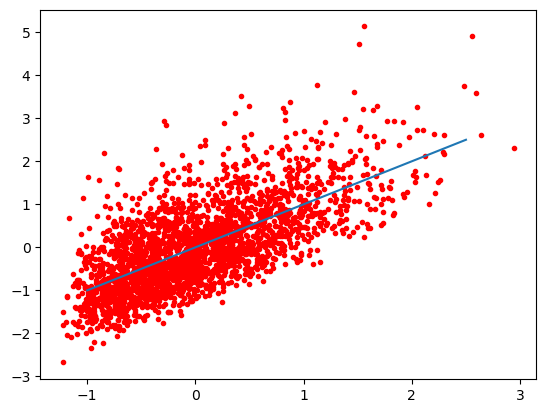

In [40]:
plt.scatter(model.predict(X_test_CMe_red),  y_test, marker='.', color='red')
plt.plot([-1, 2.5], [-1, 2.5])
plt.show()

In [67]:
import numpy as np
import ase
from ase.calculators.lj import LennardJones
import matplotlib.pyplot as plt
from dscribe.descriptors import SOAP

# Setting up the SOAP descriptor
soap = SOAP(
    species=["O", "O", "H", "H", "H", "H", "H"],
    periodic=False,
    rcut=50,
    sigma=0.5,
    nmax=3,
    lmax=0,
)

# Generate dataset of Lennard-Jones energies and forces
traj = []
n_atoms = 7
#energies = np.zeros(n_samples)
#forces = np.zeros((n_samples, n_atoms, 3))
#r = np.linspace(2.5, 5.0, n_samples)
for i in range(X_train.shape[0]):
    a = Atoms("OOHHHHH", [(X_train[i][j][1], X_train[i][j][2], X_train[i][j][3]) for j in range(X_train.shape[1])])
#    a.set_calculator(LennardJones(epsilon=1.0 , sigma=2.9))
#    print(a)
    traj.append(a)
#    energies[i] = a.get_total_energy()
#    forces[i, :, :] = a.get_forces()

# Create the SOAP desciptors and their derivatives for all samples. One center
# is chosen to be directly between the atoms.
derivatives, descriptors = soap.derivatives(
    traj,
    positions=[[[0, 0, 0]]] *len(X_train),
    method="analytical"
)

# Save to disk for later training
np.save("E.npy", energies)
np.save("D.npy", descriptors)
np.save("dD_dr.npy", derivatives)